In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

ModuleNotFoundError: No module named 'matplotlib'

In [713]:
df = pd.read_csv(r"C:\Users\e\Desktop\Data Science and AI BootCamp\perfumes\noon_perfumes_dataset.csv")
df.head(2)

,Unnamed: 0,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings
0,0,PACO RABANNE,1 Million Lucky,395.0,244.55,100,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",5.0,noon,4.2,98.1K
1,1,Roberto Cavalli,Paradiso Assoluto,415.0,107.95,50,EDP,Women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily,4.8,noon,4.2,98.1K


In [714]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1003 non-null   int64  
 1   brand               1003 non-null   object 
 2   name                1003 non-null   object 
 3   old_price           1003 non-null   float64
 4   new_price           1003 non-null   float64
 5   ml                  1003 non-null   int64  
 6   concentration       1003 non-null   object 
 7   department          1003 non-null   object 
 8   scents              1003 non-null   object 
 9   base_note           1003 non-null   object 
 10  middle_note         1003 non-null   object 
 11  item_rating         1003 non-null   float64
 12  seller              1003 non-null   object 
 13  seller_rating       1003 non-null   float64
 14  num_seller_ratings  1003 non-null   object 
dtypes: float64(4), int64(2), object(9)
memory usage: 117.7+

In [715]:
df['concentration'].value_counts()

concentration
EDT    503
EDP    494
PDT      3
Oil      2
EDC      1
Name: count, dtype: int64

In [716]:
df.tail(2)

,Unnamed: 0,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings
1001,1001,SWISS ARABIAN,Layali CPO At,126.0,77.0,15,EDT,Unisex,Arabian,Agarwood and Amber,"Ylang-Ylang, Rose and Jasmine",4.0,Swiss Arabian PerfumesPRICE UPDATE WITH 15% VA...,3.9,5
1002,1002,LACOSTE,L.12.12 Blanc-Pure,347.0,94.2,100,EDT,Men,Woody,"Virginia Cedar, Leather, Suede, Vetiver","Ylang-Ylang, Tuberose",4.6,noon,4.2,98.1K


In [717]:
df.shape

(1003, 15)

In [718]:
df.describe()

,Unnamed: 0,old_price,new_price,ml,item_rating,seller_rating
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,501.000000,321.176022,149.574307,92.862413,4.530907,14.143170
std,289.685462,234.195846,108.686013,27.496053,0.555504,64.706572
min,0.000000,5.350000,5.350000,1.000000,1.000000,3.500000
25%,250.500000,140.500000,80.325000,80.000000,4.400000,3.800000
50%,501.000000,310.000000,135.000000,100.000000,4.600000,3.900000
75%,751.500000,455.000000,198.525000,100.000000,5.000000,4.200000
max,1002.000000,2350.000000,904.850000,200.000000,5.000000,454.000000


In [719]:
print(df.isnull().sum())

Unnamed: 0            0
brand                 0
name                  0
old_price             0
new_price             0
ml                    0
concentration         0
department            0
scents                0
base_note             0
middle_note           0
item_rating           0
seller                0
seller_rating         0
num_seller_ratings    0
dtype: int64


In [720]:
df = df.drop_duplicates(inplace= True)

In [721]:
df.shape

(1003, 15)

In [722]:
unneeded_cols = ['Unnamed: 0', 'old_price', 'ml', 'base_note', 'middle_note', 'seller', 'seller_rating', 'num_seller_ratings']
df.drop(columns=unneeded_cols, axis = 1, inplace=True)

In [723]:
df.shape

(1003, 7)

In [724]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          1003 non-null   object 
 1   name           1003 non-null   object 
 2   new_price      1003 non-null   float64
 3   concentration  1003 non-null   object 
 4   department     1003 non-null   object 
 5   scents         1003 non-null   object 
 6   item_rating    1003 non-null   float64
dtypes: float64(2), object(5)
memory usage: 55.0+ KB


In [725]:
columns_to_lower = ['brand', 'name', 'concentration', 'department', 'scents']
df[columns_to_lower] = df[columns_to_lower].apply(lambda x: x.str.lower())
df[columns_to_lower] = df[columns_to_lower].apply(lambda x: x.str.replace('[^a-z0-9\s]', '', regex=True))
df[columns_to_lower].value_counts()

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\e\AppData\Local\Temp\ipykernel_5320\408701120.py:3: SyntaxWarning: invalid escape sequence '\s'
  df[columns_to_lower] = df[columns_to_lower].apply(lambda x: x.str.replace('[^a-z0-9\s]', '', regex=True))


brand               name               concentration  department  scents  
lalique             encre noire        edt            men         woody       7
calvin klein        beauty             edp            women       floral      6
joop                homme              edt            men         citrus      6
mancera             roses vanille      edp            women       arabian     6
versace             eros               edp            women       citrus      6
                                                                             ..
escada              especially elixir  edp            women       woody       1
emporio armani      stronger with you  edt            unisex      floral      1
                                                      men         floral      1
                    because its you    edp            women       floral      1
yves saint laurent  rive gauche homme  edt            men         aromatic    1
Name: count, Length: 691, dtype: int64

C:\Users\e\AppData\Local\Temp\ipykernel_5320\2117176095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


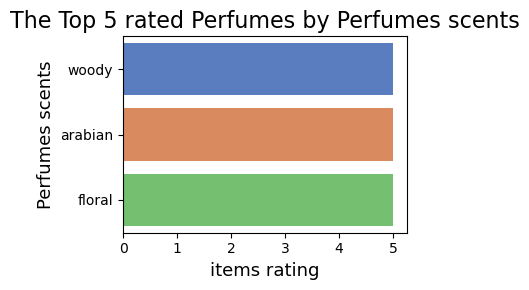

In [726]:
top5_rated = df.nlargest(5, 'item_rating').sort_values('item_rating', ascending=True)
plt.figure(figsize=(4, 3))
sns.barplot(
    x = 'item_rating',
    y = 'scents',
    data = top5_rated,
    palette = 'muted'
)
plt.title("The Top 5 rated Perfumes by Perfumes scents", fontsize=16)
plt.xlabel("items rating", fontsize=13)
plt.ylabel("Perfumes scents", fontsize=13)
plt.tight_layout()
plt.show()

In [727]:
rating = df['item_rating']
df.drop(columns='item_rating', axis=1, inplace=True)
df['item_rating'] = rating
df.head(2)

,brand,name,new_price,concentration,department,scents,item_rating
0,paco rabanne,1 million lucky,244.55,edt,men,woody,5.0
1,roberto cavalli,paradiso assoluto,107.95,edp,women,floral,4.8


In [728]:
le_name = LabelEncoder()
le_brand = LabelEncoder()
le_concentration = LabelEncoder()
le_department = LabelEncoder()
le_scents = LabelEncoder()
df['name'] = le_name.fit_transform(df['name'])
df['brand'] = le_brand.fit_transform(df['brand'])
df['concentration'] = le_concentration.fit_transform(df['concentration'])
df['department'] = le_department.fit_transform(df['department'])
df['scents'] = le_scents.fit_transform(df['scents'])

In [743]:
df['concentration'].value_counts()

concentration
2    498
1    471
4      3
3      2
0      1
Name: count, dtype: int64

In [729]:
df.head(3)

,brand,name,new_price,concentration,department,scents,item_rating
0,122,1,244.55,2,1,18,5.0
1,136,419,107.95,1,3,5,4.8
2,144,477,186.90,1,2,0,5.0


Text(0.5, 1.0, 'new prices outliers')

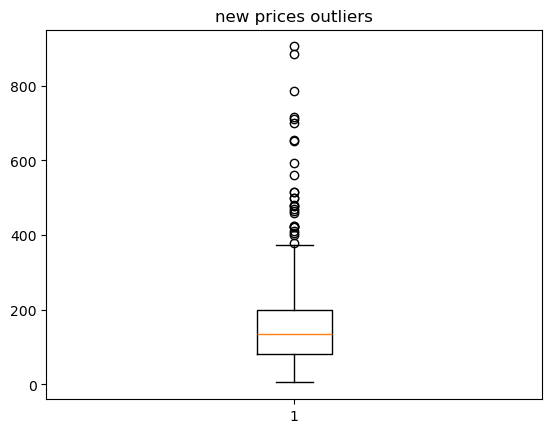

In [730]:
plt.boxplot(df['new_price'])
plt.title("new prices outliers")

In [731]:
df.shape

(1003, 7)

In [732]:
def outlier(df, column) :
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75) 
    IQR = Q3 - Q1
    outlier_indices = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].index
    return outlier_indices

outlier_indices = outlier(df, 'new_price')
df = df.drop(outlier_indices)

Text(0.5, 1.0, 'new prices outliers after Detection')

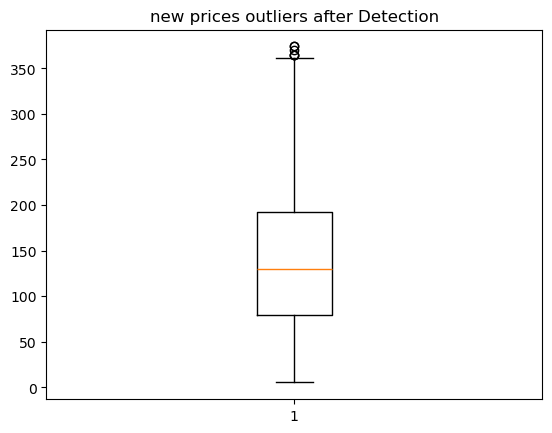

In [733]:
plt.boxplot(df['new_price'])
plt.title("new prices outliers after Detection")

In [734]:
df.shape

(975, 7)

In [735]:
scaler = StandardScaler()
x = df.drop('item_rating', axis = 1)
y = df['item_rating']
numerical_cols =['new_price']
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])

In [736]:
x.head(3)

,brand,name,new_price,concentration,department,scents
0,122,1,1.283548,2,1,18
1,136,419,-0.364581,1,3,5
2,144,477,0.587979,1,2,0


C:\Users\e\AppData\Local\Temp\ipykernel_5320\3262863711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


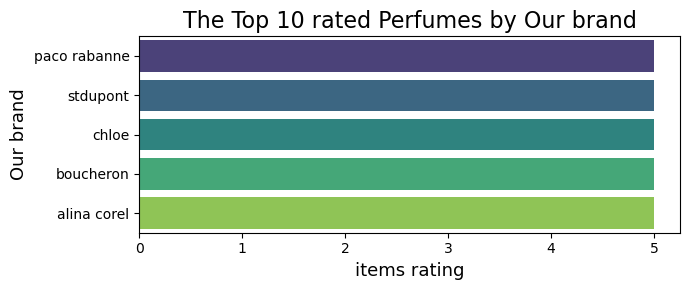

In [737]:
top10_rated = df.nlargest(10, 'item_rating').sort_values('item_rating', ascending=True)
plt.figure(figsize=(7, 3))
sns.barplot(
    x = 'item_rating',
    y = 'brand',
    data = top5_rated,
    palette = 'viridis'
)
plt.title("The Top 10 rated Perfumes by Our brand", fontsize=16)
plt.xlabel("items rating", fontsize=13)
plt.ylabel("Our brand", fontsize=13)
plt.tight_layout()
plt.show()

In [738]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(
    n_estimators=100,  # عدد الأشجار
    max_depth=5,      # عمق الشجرة (مثال للعمق)
    min_samples_split=2,  # أقل عدد للعينات لتقسيم العقد
    min_samples_leaf=1,   # أقل عدد للعينات في الأوراق
)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5)

In [739]:
train_pred = rf.predict(x_train)
test_pred = rf.predict(x_test)
print("MSE for trainig data is : ", mean_absolute_error(y_train, train_pred))
print("MSE for testing data is : ", mean_absolute_error(y_test, test_pred))


MSE for trainig data is :  0.30753164068498084
MSE for testing data is :  0.37724993348373376


In [740]:
test_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, test_pred) 
mae = mean_absolute_error(y_test, test_pred) 
r2 = r2_score(y_test, test_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

#overfitting occured

Mean Squared Error: 0.35958857734874616
Mean Absolute Error: 0.37724993348373376
R-squared: 0.040374684623510126


In [741]:
joblib.dump( le_concentration, "le_concentration.pkl")
joblib.dump( le_name, "le_name.pkl")
joblib.dump( le_brand, "le_brand.pkl")
joblib.dump( le_department, "le_department.pkl")
joblib.dump( le_scents, "le_scents.pkl")
joblib.dump( scaler, "scaler.pkl")
joblib.dump(rf, "rf_model.pkl")

['rf_model.pkl']

In [742]:
df.head()

,brand,name,new_price,concentration,department,scents,item_rating
0,122,1,244.55,2,1,18,5.0
1,136,419,107.95,1,3,5,4.8
2,144,477,186.90,1,2,0,5.0
3,67,502,103.20,2,1,15,3.0
4,136,555,94.95,1,3,0,4.8
